## *Springboard Data Analytics Career Track*

# Capstone Two: The Ames House Prices Analysis
## Business Intelligence and Modeling Analysis for House Price Predictions
---

### Huseyin Korkmaz
#### 7/13/2020
---

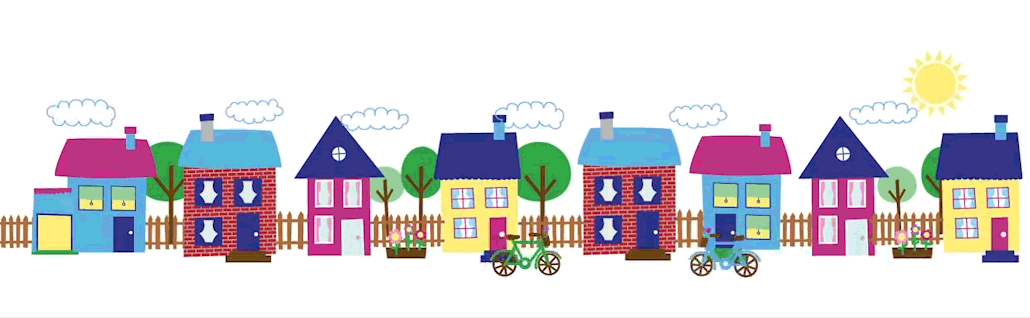

### Business Problem

**How can BlueStone Realty Inc. increase the revenue by at least 16% in 5 months by analyzing the effect of house remodeling on the sale price and implementing predictive analytics?**

* (According to our scenario) BlueStone Realty Inc. is a realtor company that has a large business in  Ames, Iowa. During July 2010, BlueStone Realty Inc. takes notice that the actual revenue is 4,000,000 Dollars less than the budget revenue.


* There are 1459 houses in the current market. The company has a budget of 25,000,000 Dollars to buy-sell houses for the rest of the year of 2010. BlueStone Realty Inc. wants to 

    1) Have a strategy to increase revenues by at least 16% until the end of the year.
    
    2) Determine the top houses which are expected to provide the most revenue opportunities.
    
    
* To identify a strategy for more revenues and to determine the target houses, we will analyze the dataset that has the values of 1460 sold houses during the 5 previous years (January 2006 - July 2010) and will develop a predictive model.


* Our main aim is to identify the revenue opportunities when we remodel the houses before selling them. We will analyze the difference in sale prices between the newly-remodeled houses and non-newly-remodeled houses. With respect to our model, we will identify the top houses that have estimated prices in a total of 25,000,000 Dollars. We will calculate that if we sell these target houses by remodeling them, how much more revenue we will gain.

---

### What will we do?

**1) Exploratory Data Analysis (EDA):** We will apply feature engineering, business analytics, data visualization, and statistics to have a better understanding of the features involved in our data and especially will focus on the features that have the highest correlation towards SalePrice.

**2) Regression Analysis:** We will develop a Multiple Linear Regression model to predict a possible SalePrice of the houses.

**3) Business Intelligence Analysis:** We will implement the predictive model on the test data (that shows 1459 houses in the current market) to help BlueStone Realty Inc. to make more data-driven decisions.

---

### Outline:

1. Libraries


2. Importing Dataset


3. Data Cleansing (Feature Engineering)


4. Issues/Hypotheses to Explore

    a. Exploring Economic Activity and Sale Prices
    
    b. Analysis of Newly-Remodeled Houses
    
    c. Exploring The Relationships Between Sale Price vs Each Variable


5. Regression Analysis and Predictive Model


6. Business Intelligence Analysis (The Top Houses for More Revenue Opportunities)


7. Insights

---

### 1) Libraries Required

In [1]:
# Pandas and Numpy for data structures and analysis
import pandas as pd
import numpy as np

# Matplotlib and Seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn for regression and predictive model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Statsmodels for OLS summary
import statsmodels.api as sm

### 2) Import Dataset

In [2]:
# Import the data
df = pd.read_csv('train.csv')

We have received the Dataset from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

### 3) Data Cleansing (Feature Engineering)

In [5]:
# Explore variables and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# Check missing values
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

It looks like 19 columns have missing values. But in this Dataset, all NaNs are not missing values, they generally signify a lack of features.

For example:

In [7]:
df.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

The column that shows Pool Quality has NaNs. But when we look at the [Data Description](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt):

---

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
       
---
We understand that these NaNs are not missing values, they signify "THERE IS NO POOL".

MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, MasVnrType, and Electrical have same issue. **So, we fill in these null values by "None" instead of dropping them.**

In [8]:
# Transforming null values
df['PoolQC'] = df['PoolQC'].fillna("None")
df['MiscFeature'] = df['MiscFeature'].fillna("None")
df['Alley'] = df['Alley'].fillna("None")
df['Fence'] = df['Fence'].fillna("None")
df['FireplaceQu'] = df['FireplaceQu'].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')
df['MasVnrType'] = df['MasVnrType'].fillna("None")
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [9]:
# We have several columns that contain null values we should replace them with the median those null values
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
# Group by Neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# Fill in missing values by "0"
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
    
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [11]:
# Let's check the Utilities
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [12]:
# Drop Utilities 
df = df.drop(['Utilities'], axis=1)

In [13]:
# Maintain and Drop ID column
df_id = df['Id']
df = df.drop(['Id'], axis=1)

We think adding some features such as 'Total Sq Footage' and 'House Age' will be useful for our analysis;

In [14]:
# Adding Total sqfootage feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Adding House Age that shows how old they are when they sold 
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

In [15]:
df.shape

(1460, 81)

### 4) Issues/Hypotheses to Explore

Our main aim is to identify the revenue opportunities when we remodel the houses before selling them. We will analyze the difference in sale prices between the newly-remodeled houses and non-newly-remodeled houses. 

### 4.a. Exploring Economic Activity and Sale Prices

We will visualize how the housing market in Ames, IOWA performed during the years 2006 - 2010.

In [16]:
# Describe sale price
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

1460 houses sold in total. The mean price of the houses is 180,921. The standard deviation is pretty high at 79442.50.

In [17]:
# Calculate the total sale price for each year
df.groupby('YrSold').SalePrice.sum()

YrSold
2006    57320530
2007    61214777
2008    53917695
2009    60648051
2010    31043893
Name: SalePrice, dtype: int64

In [18]:
# Calculate the number of houses sold for each year
df.groupby('YrSold').SalePrice.count()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: SalePrice, dtype: int64

It looks there is a drop in the number of houses sold during the year 2010. Because the data was recorded until July 2010. (According to our scenario, we will plan some actions for August 2010 and later.)

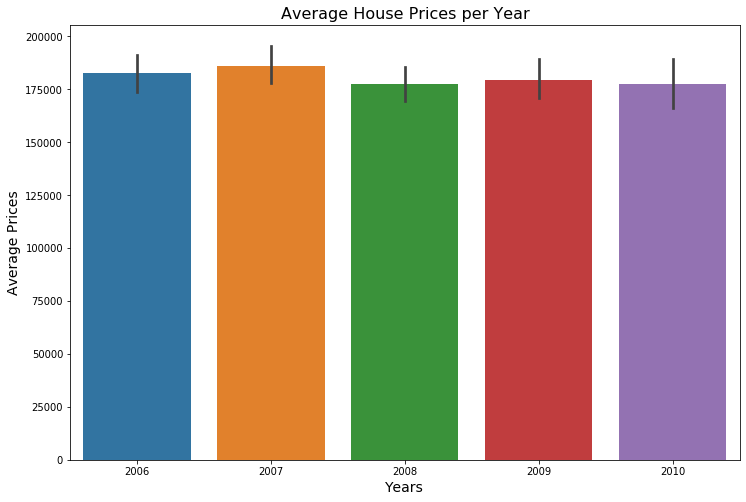

In [19]:
# Yearly Average House Prices
plt.figure(figsize=(12,8))
sns.barplot(x='YrSold', y='SalePrice', data=df)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Average Prices', fontsize=14)
plt.title('Average House Prices per Year', fontsize=16)
plt.show()

In [20]:
# Calculate the mean sale price for each year
df.groupby('YrSold').SalePrice.mean()

YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64

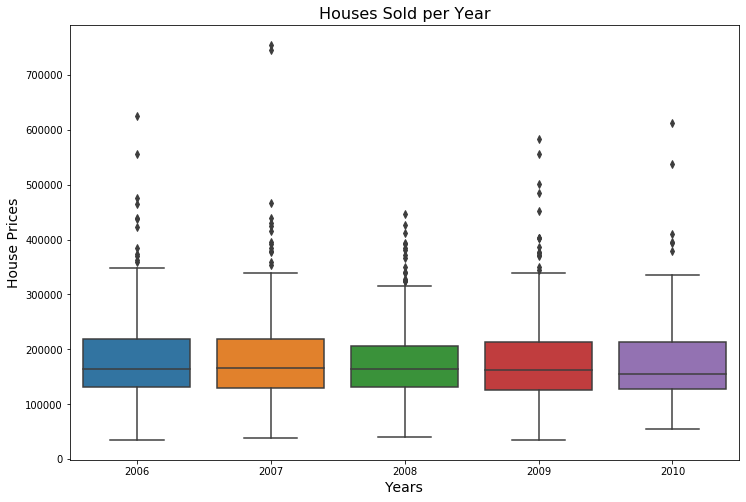

In [21]:
# Boxplot for Sale Prices (Yearly)
plt.figure(figsize=(12,8))
sns.boxplot(x='YrSold', y='SalePrice', data=df)
plt.xlabel('Years', fontsize=14)
plt.ylabel('House Prices', fontsize=14)
plt.title('Houses Sold per Year', fontsize=16)
plt.show()

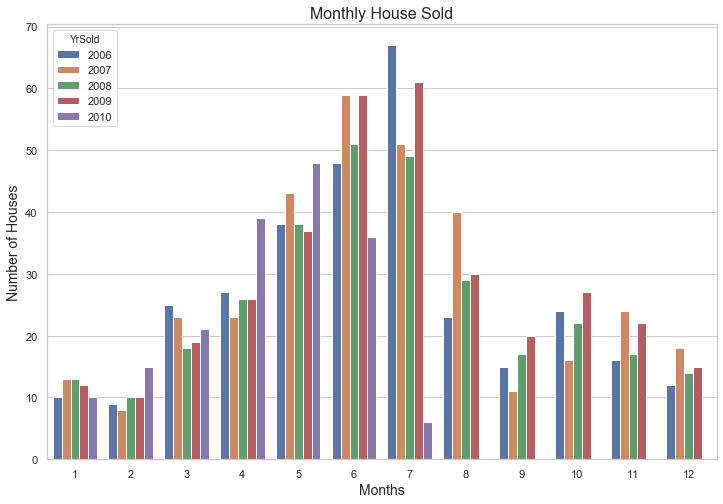

In [22]:
# Monthly house sold
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
sns.countplot(x="MoSold", hue="YrSold", data=df)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Number of Houses', fontsize=14)
plt.title('Monthly House Sold', fontsize=16)
plt.show()

**Market Analysis Summary**

* The average house price was at its peak in 2007 (186k) and it was at its lowest point during the year of 2008 and 2010 (177k) a difference of 11k.

* 338 houses were sold during the year of 2009. Less houses were sold during the year of 2010 compared to the other years, because there is no records after July/2010.
 
* People tend to buy houses during the summer. June and July were the months in which most houses were sold.

---

### 4.b. Analysis of Newly-Remodeled Houses

Our main aim is to identify the revenue opportunities when we remodel houses before selling them. We will analyze the difference in sale prices between the newly remodeled houses and non-newly-remodeled houses.

**What is a Newly-Remodeled House?**

Our dataset has 'YearRemodAdd' that shows remodeling years. According to our concept, all houses that had remodeling are not newly-remodeled houses. If a house was remodeled one year or less time before it was sold, it shows this house was remodeled for sale and it is a **Newly-Remodeled House**. We will call **No-Newly-Remodeled Houses** that weren't remodeled or were remodeled more than one year before sales.

**A Problem with 'YearRemodAdd'**

'YearRemodAdd' shows remodeling years, but is the same as construction date ('YearBuilt') if no remodeling or additions. It means if YearBuilt and YearRemodAdd have the same value, this house wasn't remodeled.

In [23]:
# Identify remodeled houses and create a feature that shows 1 (True) and 0 (False)
df['Remodeled'] = 1
df.loc[(df.YearBuilt == df.YearRemodAdd), "Remodeled" ] = 0

In [24]:
df.Remodeled.value_counts()

0    764
1    696
Name: Remodeled, dtype: int64

There are 696 remodeled and 765 non-remodeled houses in our dataset. Let's check how many of all remodeled houses are newly-remodeled;

In [25]:
# Houses which were remodeled and then sold in a year
# A new DataFrame for newly-remodeled houses
NewlyRemodeled = df[(df.YearBuilt != df.YearRemodAdd) & (df.YrSold - df.YearRemodAdd <= 1)]
NewlyRemodeled

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,HouseAge,Remodeled
11,60,RL,85.0,11924,Pave,None,IR1,Lvl,Inside,Gtl,...,None,0,7,2006,New,Partial,345000,3499,1,1
13,20,RL,91.0,10652,Pave,None,IR1,Lvl,Inside,Gtl,...,None,0,8,2007,New,Partial,279500,2988,1,1
20,60,RL,101.0,14215,Pave,None,IR1,Lvl,Corner,Gtl,...,None,0,11,2006,New,Partial,325300,3534,1,1
35,60,RL,108.0,13418,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,9,2006,WD,Normal,309000,3569,2,1
48,190,RM,33.0,4456,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,6,2009,New,Partial,113000,2188,89,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,80,RL,73.0,9735,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,5,2008,WD,Normal,167500,1778,2,1
1383,30,RL,71.0,25339,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,8,2007,WD,Normal,112000,2232,89,1
1395,60,RL,88.0,12665,Pave,None,IR1,Lvl,Inside,Gtl,...,None,0,2,2007,WD,Normal,281213,3576,2,1
1432,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,Inside,Gtl,...,None,0,8,2007,WD,Normal,64500,1624,80,1


**100 newly-remodeled houses:** We can see that 100 houses were remodeled one year or less time before they were sold.

In [26]:
# Houses which were except for newly-remodeled houses
NoNewlyRemodeled = df[~((df.YearBuilt != df.YearRemodAdd) & (df.YrSold - df.YearRemodAdd <= 1))]
NoNewlyRemodeled

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,HouseAge,Remodeled
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,2,2008,WD,Normal,208500,2566,5,0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,None,0,5,2007,WD,Normal,181500,2524,31,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,None,0,9,2008,WD,Normal,223500,2706,7,1
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,None,0,2,2006,WD,Abnorml,140000,2473,91,1
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,None,0,12,2008,WD,Normal,250000,3343,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,8,2007,WD,Normal,175000,2600,8,1
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,2,2010,WD,Normal,210000,3615,32,1
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,Inside,Gtl,...,Shed,2500,5,2010,WD,Normal,266500,3492,69,1
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,4,2010,WD,Normal,142125,2156,60,1


'NoNewlyRemodeled' includes 1360 houses that weren't remodeled or were remodeled more than one year before sales.

In [27]:
# Identify newly-remodeled houses and create a feature that shows 1 (True) and 0 (False)
df['NewlyRemodeled'] = 0
df.loc[((df.YearBuilt != df.YearRemodAdd) & (df.YrSold - df.YearRemodAdd <= 1)), 'NewlyRemodeled'] = 1

In [28]:
df.shape

(1460, 83)

In [29]:
# Describe the sale price of no-newly-remodeled houses
NoNewlyRemodeled['SalePrice'].describe()

count      1360.000000
mean     176335.163235
std       73913.730152
min       34900.000000
25%      129000.000000
50%      160000.000000
75%      207700.000000
max      755000.000000
Name: SalePrice, dtype: float64

The average sale price of non-newly-remodeled houses is 176K$.

In [30]:
# Describe the sale price of newly-remodeled houses
NewlyRemodeled['SalePrice'].describe()

count       100.00000
mean     243291.24000
std      117454.63346
min       64500.00000
25%      153875.00000
50%      208200.00000
75%      317200.00000
max      611657.00000
Name: SalePrice, dtype: float64

The average sale price of newly-remodeled houses is 243K$.

In [31]:
# Difference between the average sale price of newly-remodeled houses and others'
NewlyRemodeled['SalePrice'].mean() - NoNewlyRemodeled['SalePrice'].mean()

66956.07676470588

It looks **70K$ difference** between the average sale price of newly-remodeled houses and others'.

In [32]:
# IQRs
print('IQR (All)                 : ' + str(df['SalePrice'].quantile(0.75)-df['SalePrice'].quantile(0.25)))
print('IQR (No-Newly-Remodeled)  : ' + str(NoNewlyRemodeled['SalePrice'].quantile(0.75)-NoNewlyRemodeled['SalePrice'].quantile(0.25)))
print('IQR (Newly-Remodeled)     : ' + str(NewlyRemodeled['SalePrice'].quantile(0.75)-NewlyRemodeled['SalePrice'].quantile(0.25)))

IQR (All)                 : 84025.0
IQR (No-Newly-Remodeled)  : 78700.0
IQR (Newly-Remodeled)     : 163325.0


In [33]:
# Skewness and Kurtosis
print("Skewness (All)                  : %f" % df['SalePrice'].skew())
print("Kurtosis (All)                  : %f" % df['SalePrice'].kurt())
print("------------------------------------------")
print("Skewness (No-Newly-Remodeled)   : %f" % NoNewlyRemodeled['SalePrice'].skew())
print("Kurtosis (No-Newly-Remodeled)   : %f" % NoNewlyRemodeled['SalePrice'].kurt())
print("------------------------------------------")
print("Skewness (Newly-Remodeled)      : %f" % NewlyRemodeled['SalePrice'].skew())
print("Kurtosis (Newly-Remodeled)      : %f" % NewlyRemodeled['SalePrice'].kurt())

Skewness (All)                  : 1.882876
Kurtosis (All)                  : 6.536282
------------------------------------------
Skewness (No-Newly-Remodeled)   : 1.901261
Kurtosis (No-Newly-Remodeled)   : 7.697051
------------------------------------------
Skewness (Newly-Remodeled)      : 0.992788
Kurtosis (Newly-Remodeled)      : 0.620390


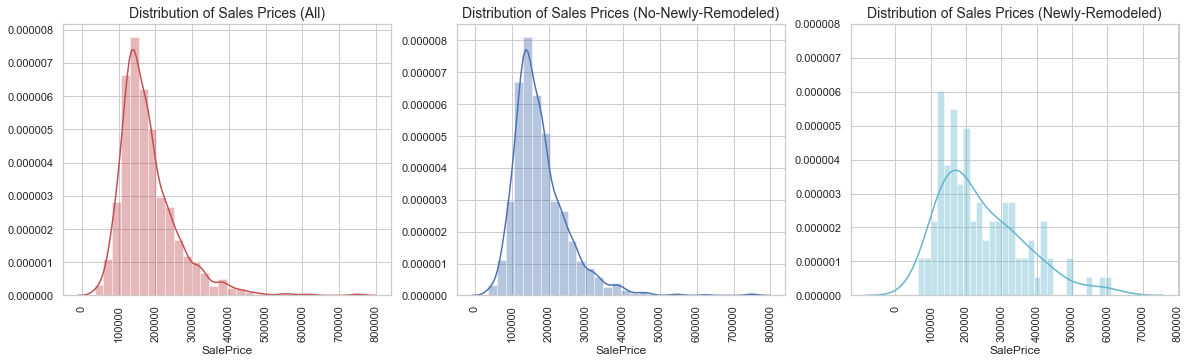

In [34]:
# Distributions of Sales Prices (Histograms)
yt = [0, 0.000001, 0.000002, 0.000003, 0.000004, 0.000005, 0.000006, 0.000007, 0.000008]
xt = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000]
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
sns.distplot(df['SalePrice'], color='r', bins=30)
plt.title('Distribution of Sales Prices (All)', fontsize=14)
plt.yticks(yt)
plt.xticks(xt, rotation=90)
plt.subplot(1,3,2)
sns.distplot(NoNewlyRemodeled['SalePrice'], color='b', bins=30)
plt.title('Distribution of Sales Prices (No-Newly-Remodeled)', fontsize=14)
plt.yticks(yt)
plt.xticks(xt, rotation=90)
plt.subplot(1,3,3)
sns.distplot(NewlyRemodeled['SalePrice'], color='c', bins=30)
plt.title('Distribution of Sales Prices (Newly-Remodeled)', fontsize=14)
plt.yticks(yt)
plt.xticks(xt, rotation=90)
plt.show()

The distribution of house prices is right skewed.

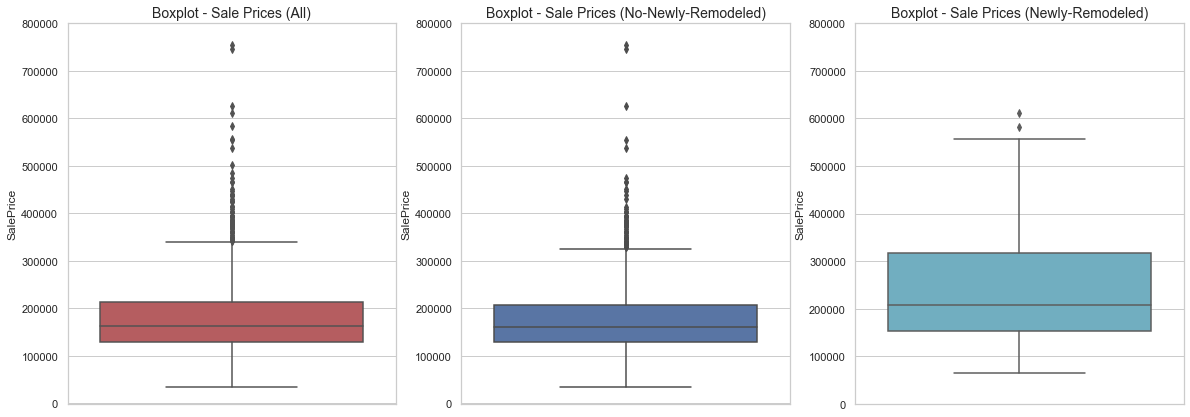

In [35]:
# Boxplots of Sales Prices
yt1 = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000]
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['SalePrice'], color='r')
plt.title('Boxplot - Sale Prices (All)', fontsize=14)
plt.yticks(yt1)
plt.subplot(1, 3, 2)
sns.boxplot(y=NoNewlyRemodeled['SalePrice'], color='b')
plt.title('Boxplot - Sale Prices (No-Newly-Remodeled)', fontsize=14)
plt.yticks(yt1)
plt.subplot(1, 3, 3)
sns.boxplot(y=NewlyRemodeled['SalePrice'], color='c')
plt.title('Boxplot - Sale Prices (Newly-Remodeled)', fontsize=14)
plt.yticks(yt1)
plt.show()

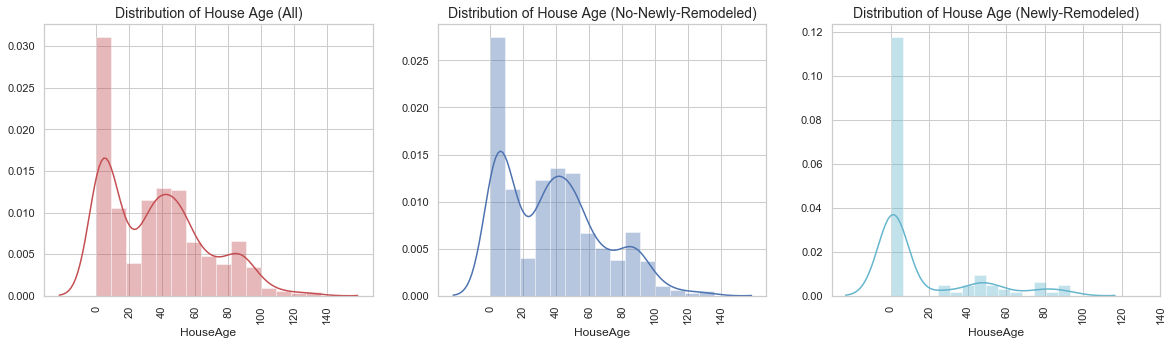

In [36]:
# Distributions of House Ages (Histograms)
xt2 = [0, 20, 40, 60, 80, 100, 120, 140]
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
sns.distplot(df['HouseAge'], color='r', bins=15)
plt.title('Distribution of House Age (All)', fontsize=14)
plt.xticks(xt2, rotation=90)
plt.subplot(1,3,2)
sns.distplot(NoNewlyRemodeled['HouseAge'], color='b',  bins=15)
plt.title('Distribution of House Age (No-Newly-Remodeled)', fontsize=14)
plt.xticks(xt2, rotation=90)
plt.subplot(1,3,3)
sns.distplot(NewlyRemodeled['HouseAge'], color='c',  bins=15)
plt.title('Distribution of House Age (Newly-Remodeled)', fontsize=14)
plt.xticks(xt2, rotation=90)
plt.show()

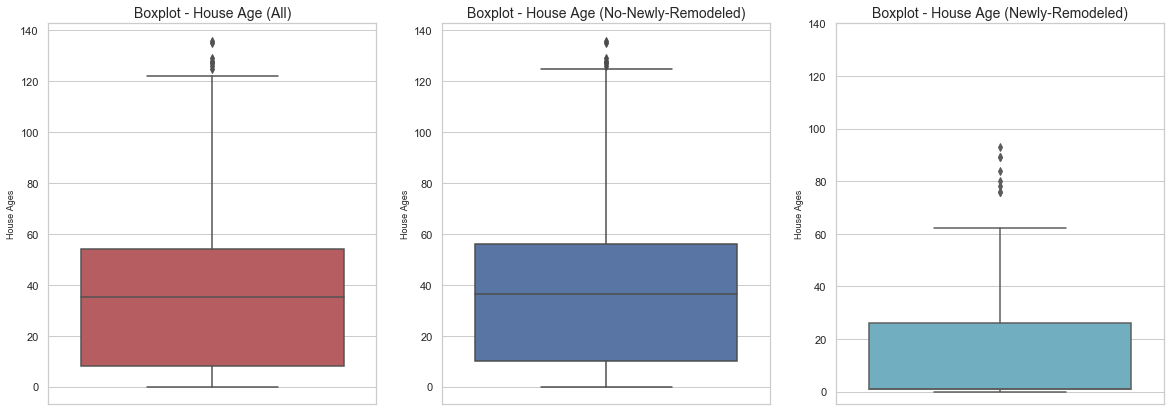

In [37]:
# Boxplots of house ages
yt3 = [0, 20, 40, 60, 80, 100, 120, 140]
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['HouseAge'], color='r')
plt.ylabel("House Ages", fontsize=9)
plt.title('Boxplot - House Age (All)', fontsize=14)
plt.yticks(yt3)
plt.subplot(1, 3, 2)
sns.boxplot(y=NoNewlyRemodeled['HouseAge'], color='b')
plt.ylabel("House Ages", fontsize=9)
plt.title('Boxplot - House Age (No-Newly-Remodeled)', fontsize=14)
plt.yticks(yt3)
plt.subplot(1, 3, 3)
sns.boxplot(y=NewlyRemodeled['HouseAge'], color='c')
plt.ylabel("House Ages", fontsize=9)
plt.title('Boxplot - House Age (Newly-Remodeled)', fontsize=14)
plt.yticks(yt3)
plt.show()

In [38]:
print('Average House Age (All)                 : ' + str(df['HouseAge'].mean()))
print('Average House Age (No-Newly-Remodeled)  : ' + str(NoNewlyRemodeled['HouseAge'].mean()))
print('Average House Age (Newly-Remodeled)     : ' + str(NewlyRemodeled['HouseAge'].mean()))

Average House Age (All)                 : 36.54794520547945
Average House Age (No-Newly-Remodeled)  : 38.0514705882353
Average House Age (Newly-Remodeled)     : 16.1


**Newly-Remodeled Houses Analysis Summary**

* The distribution of house prices is right skewed.

* There are 100 newly-remodeled and 1360 non-newly-remodeled houses in our dataset.

* The average sale price of newly-remodeled houses is 243K while no-newly-remodeled houses' is 173K.

* Our analysis shows that there is a **70K Dollars sale price difference** between the newly-remodeled houses and others.

* It's not necessary for a house to be old for remodeling. While the average age of all houses is 36.5, Newly-Remodeled houses' average age is 16.

---

### 4.c. Exploring The Relationships between Sale Price vs Each Variable

In [39]:
# Splitting categorical variables with numerical variables
categorical = df.select_dtypes(['object'])
numerical = df.select_dtypes(exclude=['object'])

print(categorical.shape)
print(numerical.shape)

(1460, 42)
(1460, 41)


After feature engineering, our data has 42 categorical and 41 numeric variables.

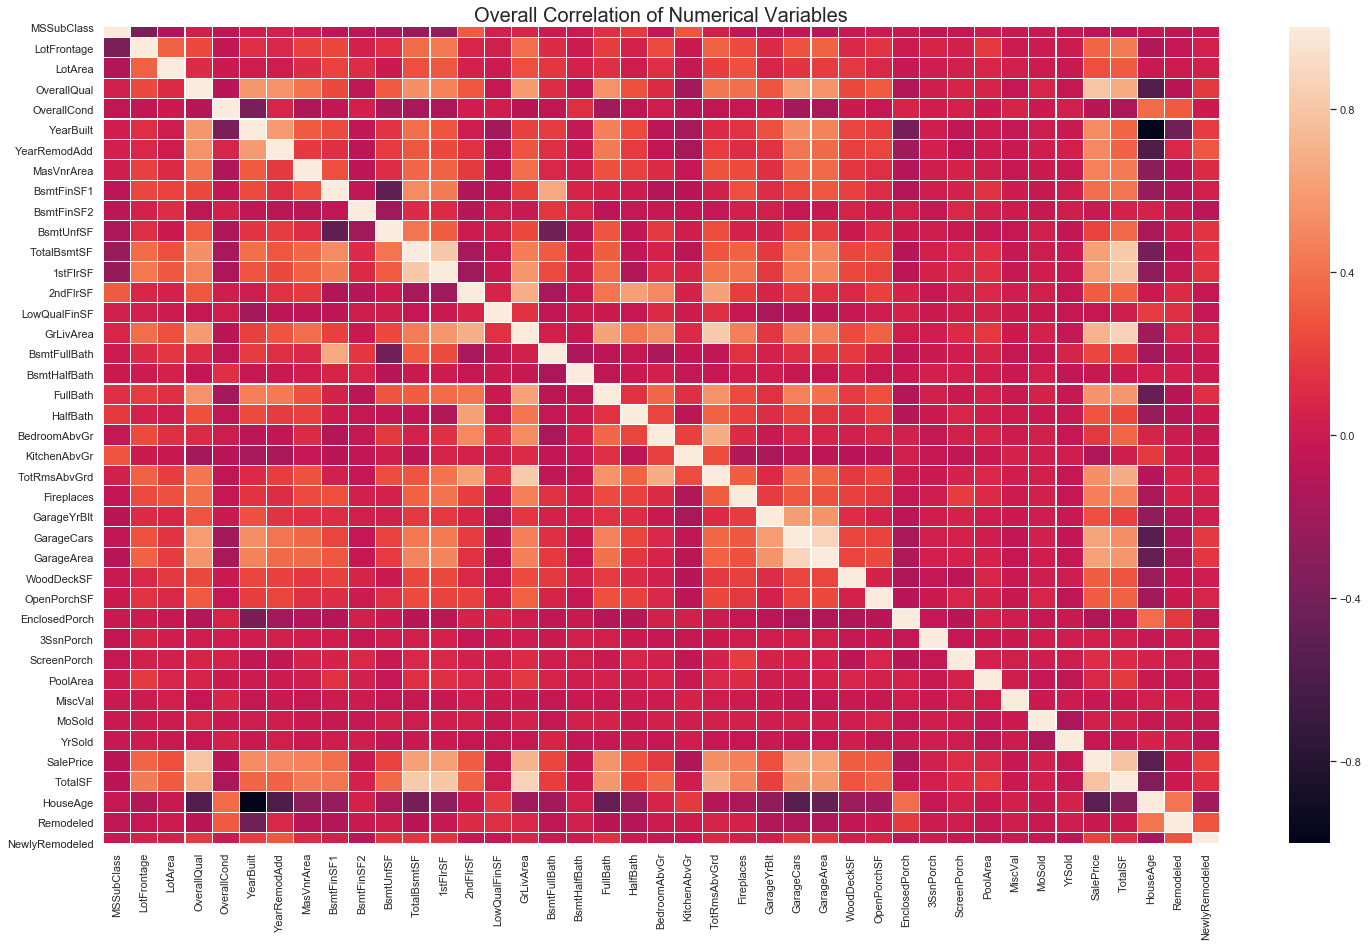

In [40]:
# Check relationship of all 41 numerical variables
corr = numerical.corr()
plt.figure(figsize=(25,15))
plt.title('Overall Correlation of Numerical Variables', fontsize=20)
sns.heatmap(corr,annot=False, linewidths=0.1, annot_kws={'size':20})
plt.show()

In [41]:
# Check relationship between SalePrice and top 14 numerical variables.
corr['SalePrice'].sort_values(ascending=False)[:15]

SalePrice       1.000000
OverallQual     0.790982
TotalSF         0.782260
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

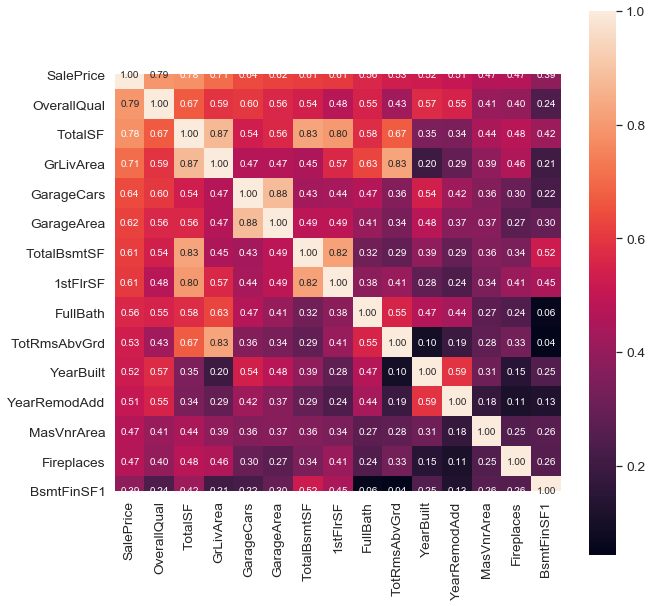

In [42]:
# Saleprice correlation matrix (zoomed heatmap style)
k = 15 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

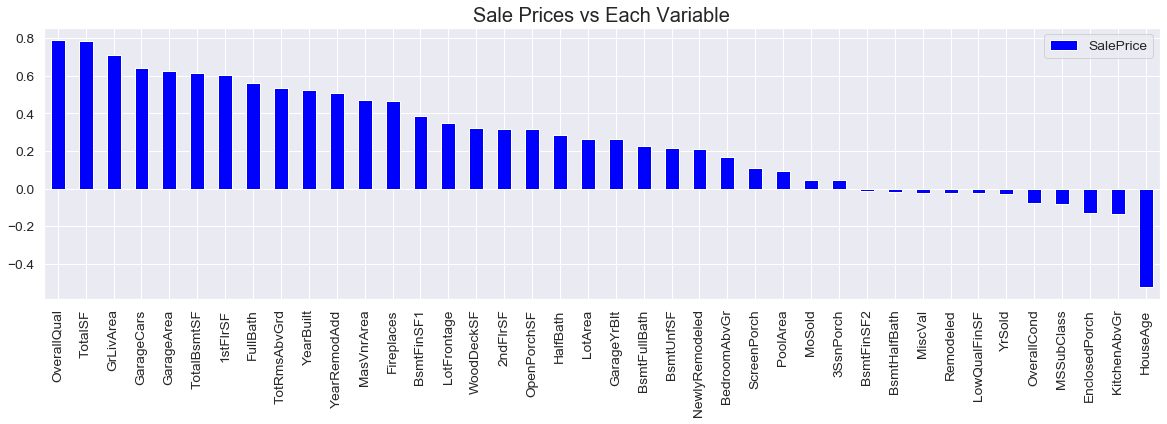

In [43]:
# Correlation Barplot for Sale Prices vs each numerical variables
y_corr=corr.loc[:, ['SalePrice']]
y_corr.drop('SalePrice').sort_values(by=['SalePrice'], ascending=False).plot(kind='bar', figsize=(20,5), color='blue')
plt.title('Sale Prices vs Each Variable', fontsize=20)
plt.show()

Based on the correlation bar chart and heatmap, I'll notice the following: There are a relatively positive linear relationship between Sale Price vs 'OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', and 'YearBuilt. We'll create targeted independent variables with over 0.20 correlation coeff against the Sale Prices of the houses for this prediction. 'HouseAge' has a negative linear relationship. We will also focus on this variable.

In [44]:
# Filter independent variables with a relative correlation (more than 0.20).
var=corr[corr['SalePrice'] > 0.20].drop('SalePrice').sort_values(by='SalePrice', ascending=False).index
targ_ind1 = df.filter(var)
print('Targeted Independent variables filtered by correlation: '  + str(len(targ_ind1.columns)))
print('-----------------------------------------------------------------------------')
var

Targeted Independent variables filtered by correlation: 24
-----------------------------------------------------------------------------


Index(['OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea',
       'GarageYrBlt', 'BsmtFullBath', 'BsmtUnfSF', 'NewlyRemodeled'],
      dtype='object')

In [45]:
# All variables that has numbers are not numeric variables, some of them categorical variables
numeric_vars = df[['TotalSF', 'GrLivArea', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'LotArea',
       'GarageYrBlt', 'BsmtUnfSF']]
categorical_vars = df[['OverallQual', 'GarageCars', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'HalfBath', 'BsmtFullBath', 'NewlyRemodeled']]

### 4.c.I. Significant Numeric Values

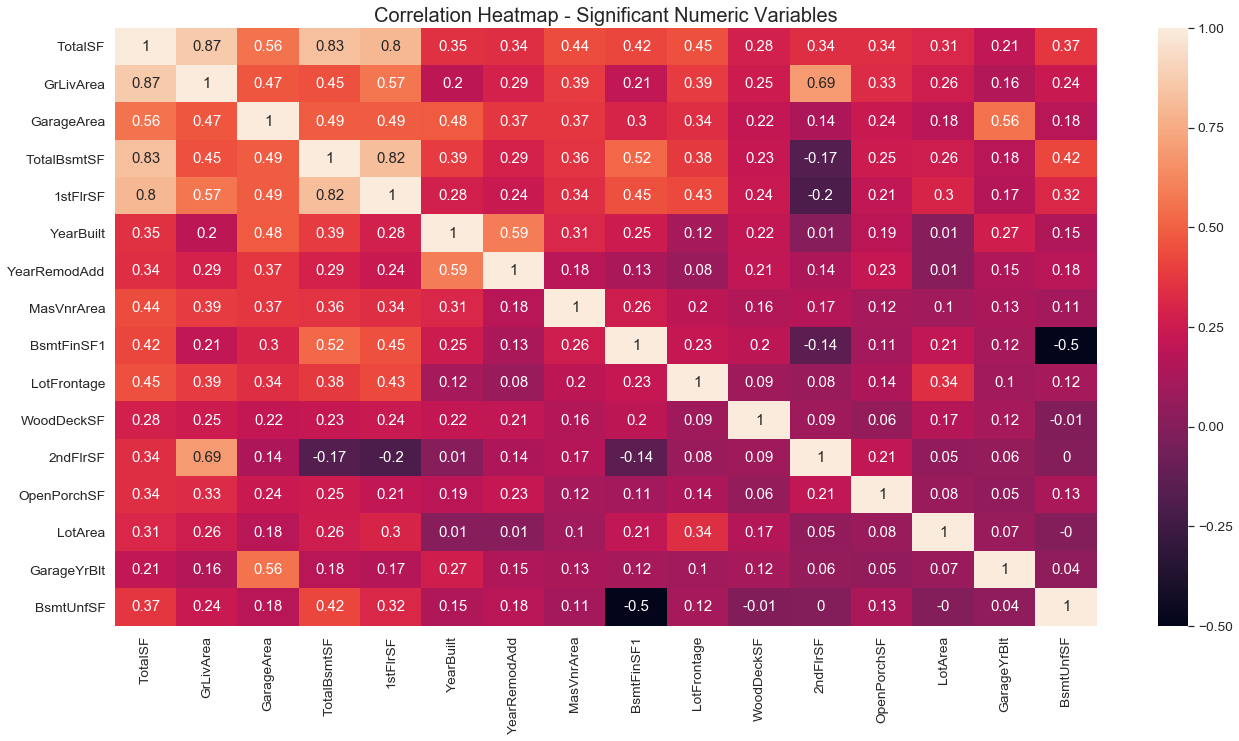

In [46]:
# Check relationship of all targeted numerical variables
fig, axis=plt.subplots(figsize=(22,11))
numeric_vars_corr=round(numeric_vars.corr(), 2)
plt.title('Correlation Heatmap - Significant Numeric Variables', fontsize=20)
ax=sns.heatmap(numeric_vars_corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

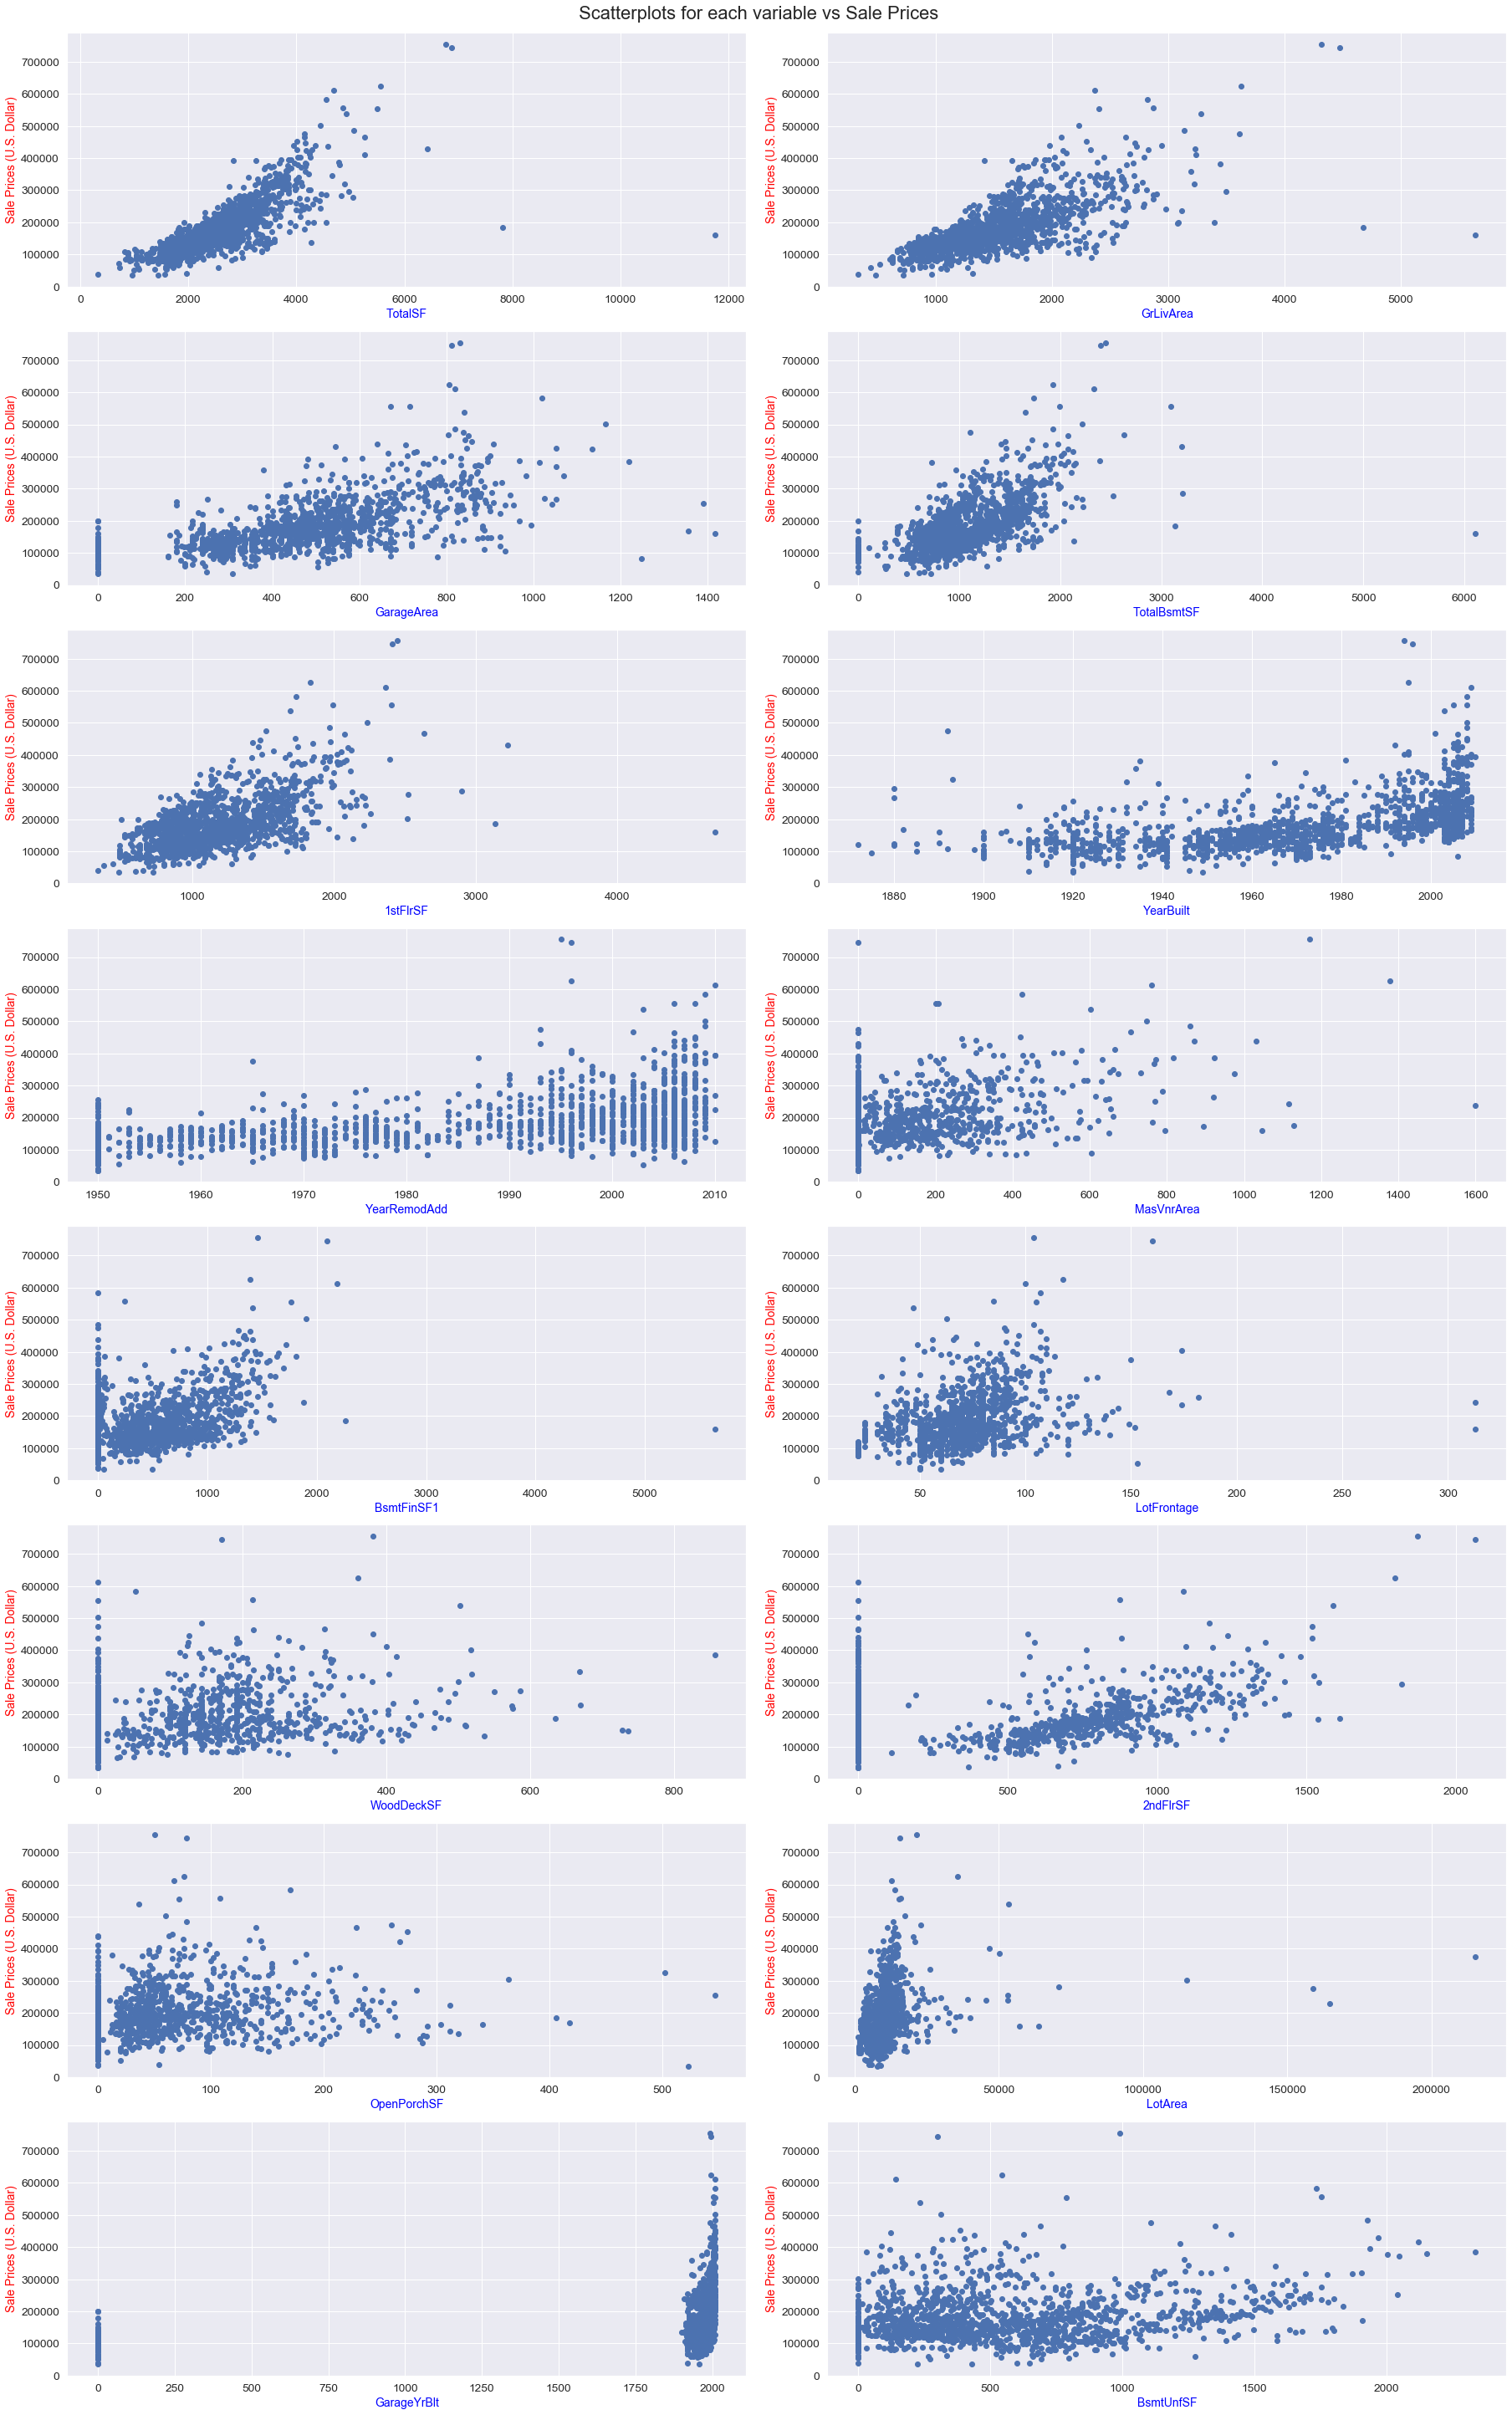

In [47]:
# Create scatterplots for Sale Prices vs each targeted numeric variables
targ_dep=df['SalePrice']

fig, axes = plt.subplots(8, 2, figsize=(25,40), constrained_layout=True)
fig.suptitle('Scatterplots for each variable vs Sale Prices', size=22)
axes=axes.flatten()
for i, y in enumerate(numeric_vars):
    ax=axes[i]
    ax.set_xlabel(y, color='blue', size=14)
    ax.set_ylabel('Sale Prices (U.S. Dollar)', color='red', size=14)
    ax.plot(numeric_vars[y], targ_dep, marker='o', linestyle='')

**The Influence of Space:** How much influence does space have towards the price of the house. Intuitively, we might think the bigger the house the higher the price but let's take a look in order to see if it actually has a positive correlation towards SalePrice.

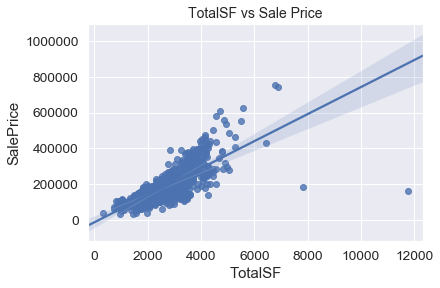

In [48]:
# Scatter plot total sqfootage vs sale price
sns.regplot(x="TotalSF", y="SalePrice", data=df)
plt.title("TotalSF vs Sale Price", fontsize=14)
plt.show()

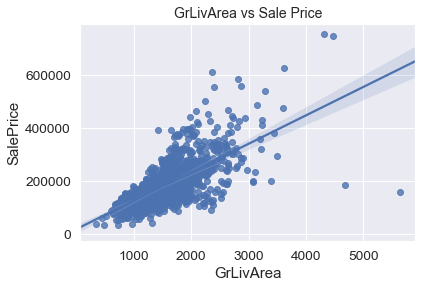

In [49]:
# Scatter plot GrLivArea vs Saleprice
sns.regplot(x="GrLivArea", y="SalePrice", data=df)
plt.title("GrLivArea vs Sale Price", fontsize=14)
plt.show()

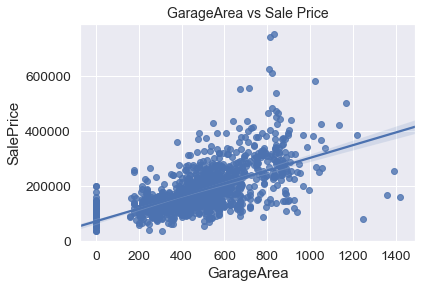

In [50]:
# Scatter plot GarageArea vs Saleprice
sns.regplot(x="GarageArea", y="SalePrice", data=df)
plt.title("GarageArea vs Sale Price", fontsize=14)
plt.show()

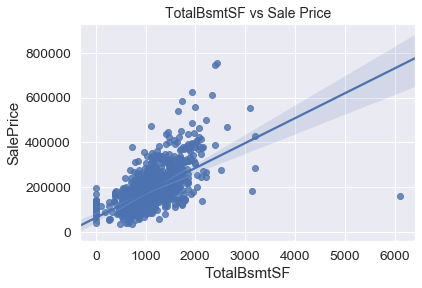

In [51]:
# Scatter plot TotalBsmtSF vs Saleprice
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=df)
plt.title("TotalBsmtSF vs Sale Price", fontsize=14)
plt.show()

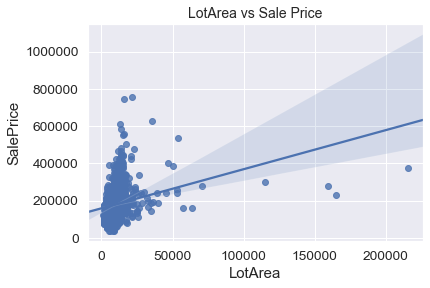

In [52]:
# Scatter plot LotArea vs Saleprice
sns.regplot(x="LotArea", y="SalePrice", data=df)
plt.title("LotArea vs Sale Price", fontsize=14)
plt.show()

These scatter plots show that the bigger the house the higher the price.

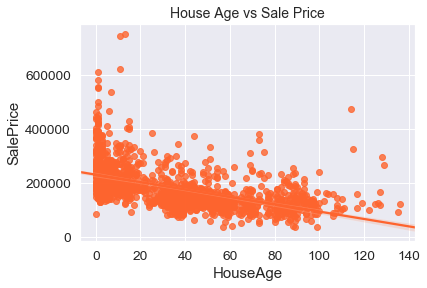

In [53]:
# House Age has negative correlation!
sns.regplot(x="HouseAge", y="SalePrice", data=df, color='#FE642E')
plt.title("House Age vs Sale Price", fontsize=14)
plt.show()

**Summary of Numeric Variables Analysis:**

TotalSf: The total area square feet is positively correlated with the price of the house.

GrlivingArea: The living area square feet is positively correlated with the price of the house.

GarageArea: Apparently, the space of the garage is an important factor that contributes to the price of the house.

TotalBsmtSF: The square feet of the basement contributes positively to the value of the house.

LotArea: We would say from all the area features this variable influences the less on the price of the house.

HouseAge: The house age is negatively correlated with the price of the house.

---


### 4.c.II. Significant Categorical Values (Quality of Neighborhoods)

According to the Data Description:

---
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
---
Let's analyze how the quality of the house impacts Sale Price. 

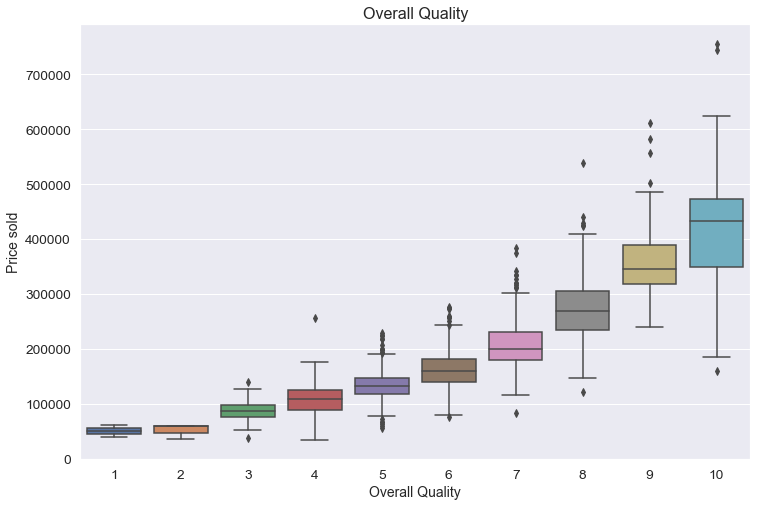

In [54]:
# Box plot of overallqual/saleprice
plt.figure(figsize=(12,8))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.xlabel('Overall Quality', fontsize=14)
plt.ylabel('Price sold', fontsize=14)
plt.title('Overall Quality', fontsize=16)
plt.show()

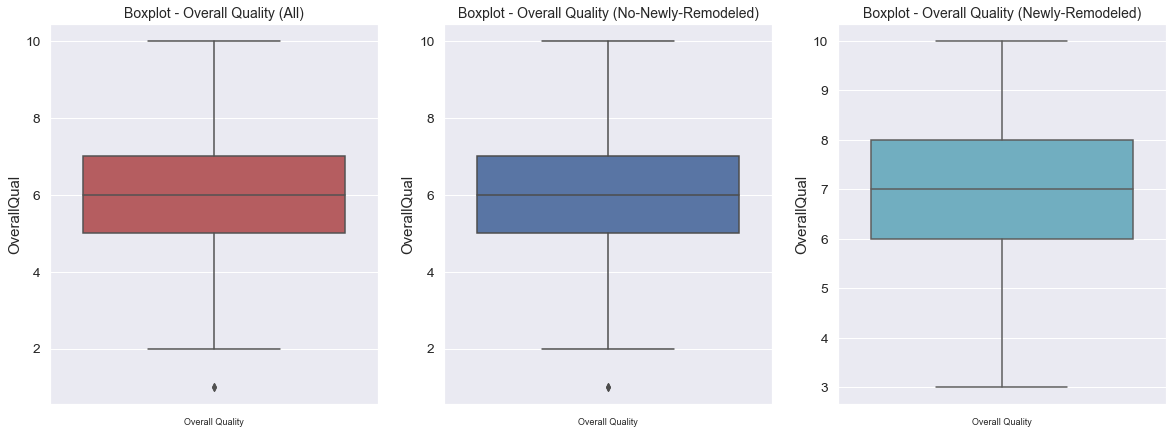

In [55]:
# Box plots of overallqual/saleprice (W.r.t. Newly-Remodeled Houses)
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['OverallQual'], color='r')
plt.xlabel("Overall Quality", fontsize=9)
plt.title('Boxplot - Overall Quality (All)', fontsize=14)
plt.subplot(1, 3, 2)
sns.boxplot(y=NoNewlyRemodeled['OverallQual'], color='b')
plt.xlabel("Overall Quality", fontsize=9)
plt.title('Boxplot - Overall Quality (No-Newly-Remodeled)', fontsize=14)
plt.subplot(1, 3, 3)
sns.boxplot(y=NewlyRemodeled['OverallQual'], color='c')
plt.xlabel("Overall Quality", fontsize=9)
plt.title('Boxplot - Overall Quality (Newly-Remodeled)', fontsize=14)
plt.show()

In [56]:
# Average overall qualities 
print('Average Overall Quality (All)                  : ' + str(df['OverallQual'].mean()))
print('Average Overall Quality (Non-Newly-Remodeled)  : ' + str(NoNewlyRemodeled['OverallQual'].mean()))
print('Average Overall Quality (Newly-Remodeled)      : ' + str(NewlyRemodeled['OverallQual'].mean()))

Average Overall Quality (All)                  : 6.0993150684931505
Average Overall Quality (Non-Newly-Remodeled)  : 6.034558823529411
Average Overall Quality (Newly-Remodeled)      : 6.98


We can see that;
* The quality of the house is one of the factors that mostly impacts SalePrice.
* As average overall quality of all houses is 6, Newly-Remodeled houses' is around 7. It is understood that house remodeling makes overall quality increased by 1 point.

There are 25 different neighborhoods within Ames city limits according to our data.

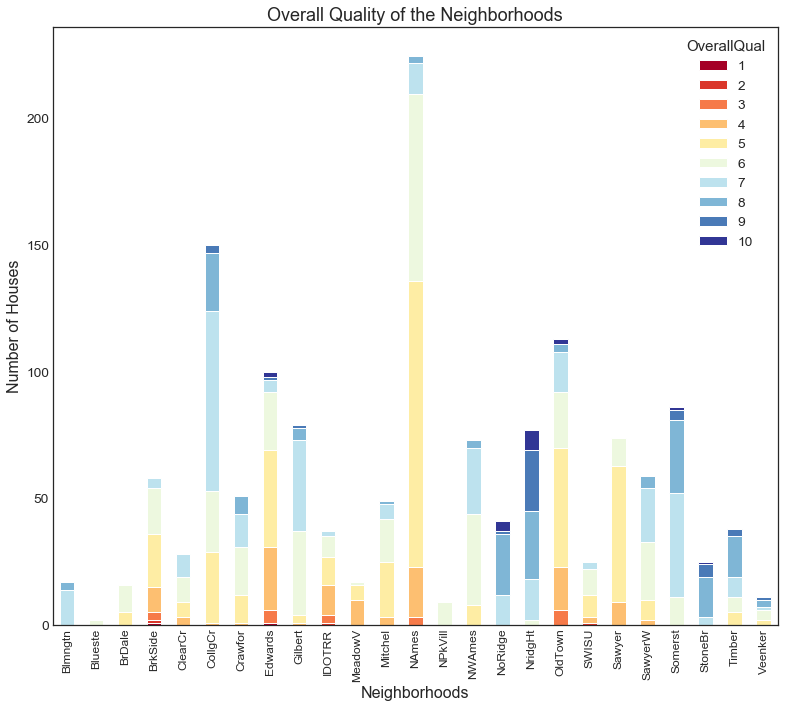

In [57]:
# Number of houses and overall quality in each neigborhoods
plt.style.use('seaborn-white')
types_foundations = df.groupby(['Neighborhood', 'OverallQual']).size()
types_foundations.unstack().plot(kind='bar', stacked=True, colormap='RdYlBu', figsize=(13,11), grid=False)
plt.ylabel('Number of Houses', fontsize=16)
plt.xlabel('Neighborhoods', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.title('Overall Quality of the Neighborhoods', fontsize=18)
plt.show()

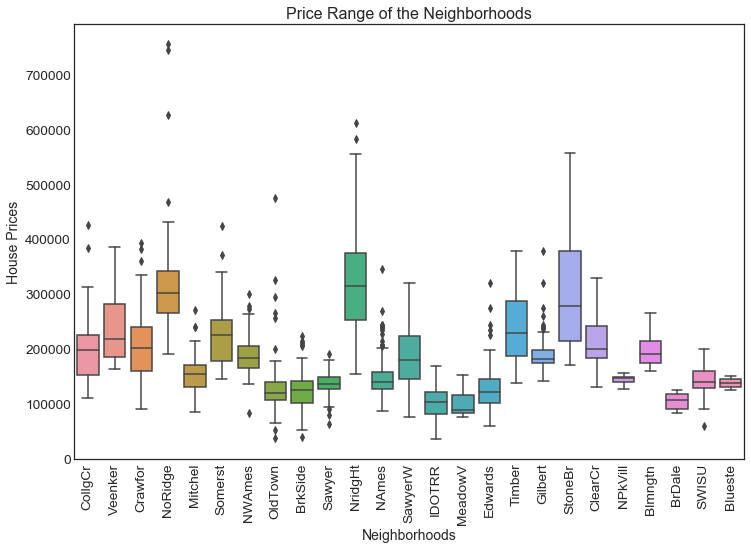

In [58]:
# Sale price range according to the neigborhood
plt.figure(figsize=(12,8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xlabel('Neighborhoods', fontsize=14)
plt.ylabel('House Prices', fontsize=14)
plt.title('Price Range of the Neighborhoods', fontsize=16)
plt.xticks(rotation=90)
plt.show()

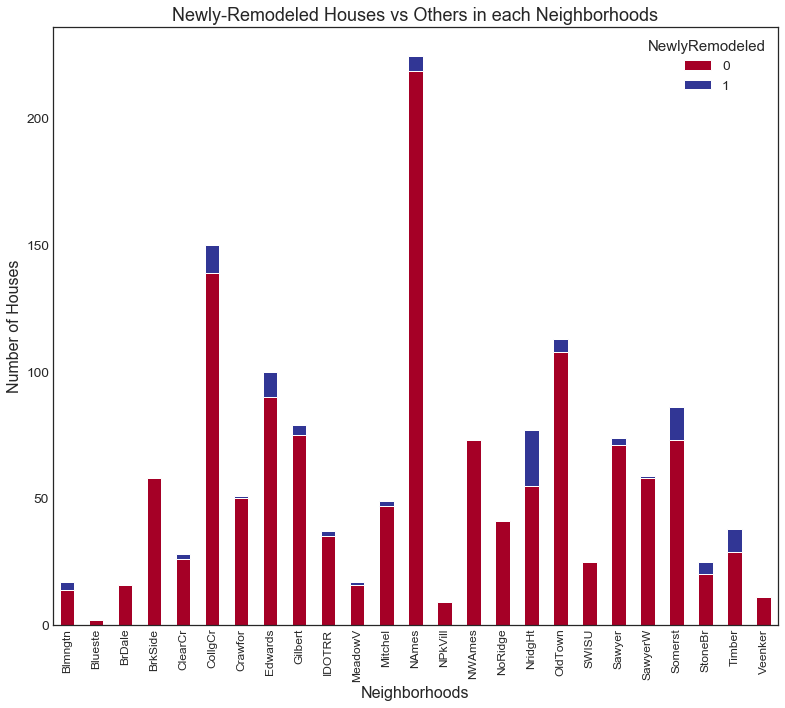

In [59]:
# Number of newly-remodeled and other houses in each neigborhoods
plt.style.use('seaborn-white')
types_foundations = df.groupby(['Neighborhood', 'NewlyRemodeled']).size()
types_foundations.unstack().plot(kind='bar', stacked=True, colormap='RdYlBu', figsize=(13,11), grid=False)
plt.ylabel('Number of Houses', fontsize=16)
plt.xlabel('Neighborhoods', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.title('Newly-Remodeled Houses vs Others in each Neighborhoods', fontsize=18)
plt.show()

**Summary of Categorical Variables Analysis:**

**1) Overall Quality:**

* The quality of the house is one of the factors that mostly impacts SalePrice. It seems that the overall material that is used for construction and the finish of the house has a great impact on SalePrice.

* As average overall quality of all houses is 6, Newly-Remodeled houses' is around 7. It is understood that house remodeling makes overall quality increased by 1 point.

**2) Neighborhoods:**

* The most exclusive Neighborhoods are Northridge, Northridge Heights, and Stone Brook. The average house price is more than 300K in these neighborhoods.

* It seems that the overall quality of the house is related to the exclusiveness of neighborhoods. More expensive areas have more high qualified houses.

* It seems that house remodeling is more common in the areas that have more expensive houses.

---

### 5) Regression Analysis and Predictive Model

The sample submission data in [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=sample_submission.csv) is a benchmark submission from a linear regression on year and month of sale, lot square footage, and the number of bedrooms. It depends on only 4 variables. So, for applying a predictive model, we will use our train data by splitting it into a train and a test data, instead of using the test data from Kaggle. We will use that test data (the test data from Kaggle) in the next step to predict the sale price of the houses which are on the market according to our business scenario.

In [60]:
# Choose the independent numeric variables
ind_numeric_vars = numerical.drop('SalePrice', axis=1)
ind_numeric_vars

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,HouseAge,Remodeled,NewlyRemodeled
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,2,2008,2566,5,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,5,2007,2524,31,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,9,2008,2706,7,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,2,2006,2473,91,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,12,2008,3343,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,8,2007,2600,8,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,2,2010,3615,32,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,2500,5,2010,3492,69,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,0,4,2010,2156,60,1,0


In [61]:
# Define the df_x and df_y for the linear regression
df_x = ind_numeric_vars
df_y = df.SalePrice

In [62]:
# Describe df_x (the independent variables)
df_x.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,HouseAge,Remodeled,NewlyRemodeled
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,2567.048630,36.547945,0.476712,0.068493
std,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,821.714421,30.250152,0.499629,0.252677
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,334.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,2009.500000,8.000000,0.000000,0.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,2474.000000,35.000000,0.000000,0.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,3004.000000,54.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,11752.000000,136.000000,1.000000,1.000000


In [63]:
reg = LinearRegression()

In [64]:
# Split the data into a train and a test data
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.15, random_state=1712)

We randomly split all numeric variables into a train (85%) and a test data (15%).

In [65]:
# Create a regression equation that models the Sales Price (Y-Variable) against all the independent variables
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
reg.coef_

array([-2.00796825e+02, -1.64964826e+02,  4.84728763e-01,  1.71611184e+04,
        5.64875854e+03,  1.69160987e+02,  4.90215956e+01,  3.64545353e+01,
        3.28056869e+00, -1.19066517e+00, -3.89944389e+00, -1.80954037e+00,
        6.99538392e+00,  7.23710395e+00,  9.40542847e+00,  2.36379163e+01,
        1.01213020e+04,  4.07234159e+03,  2.56528622e+03, -2.12832850e+03,
       -1.00512133e+04, -1.13458782e+04,  6.34233327e+03,  4.62110090e+03,
       -1.31430809e+01,  1.30461999e+04,  9.46480716e+00,  3.29995331e+01,
       -1.34961593e+01,  3.78213818e+01,  4.29845635e+01,  8.07085065e+01,
       -9.82224558e+01, -4.54637225e-01,  1.74454420e+01, -1.03612066e+02,
        1.24229475e+01, -2.72773052e+02,  3.65738541e+03,  6.52280904e+03])

In [67]:
# Assign the train prediction
train_prediction = reg.predict(x_train)

In [68]:
# The first value of train prediction
train_prediction[0]

174280.70296302377

In [69]:
# R2 Score of train
r2_score(y_train, train_prediction)

0.8187951386582997

In [70]:
# Assign the test prediction
test_prediction = reg.predict(x_test)

In [71]:
# The first value of test prediction
test_prediction[0]

333420.92242045165

In [72]:
# R2 Score of test prediction
r2_score(y_test, test_prediction)

0.7953940137196718

In [73]:
# Predictions (Predicted Sale Prices for test data)
test_prediction

array([333420.92242045, 134111.97587527,  88241.72034821, 191765.79512523,
       212685.79599701, 208226.23315762, 119287.37490075, 299320.0877929 ,
       186430.80202879, 135158.59462978,  75539.21961068, 167589.19227341,
       207782.41138777, 273620.33366032, 190248.53289634,  85724.33518497,
       120579.44525935, 139601.56240245, 110686.04405267, 261583.41080084,
       228741.22188608, 115733.72101626, 172823.21541232, 108919.94193632,
        81011.57705062, 128656.34939176, 203798.94534829, 101010.68716814,
        68493.97420744,  75467.02659523, 149888.50604219, 121340.15471652,
       176235.54295421, 133476.83059239, 101516.7046091 , 149430.05108851,
       291462.11925136, 239692.71132788, 158719.84438502, 267919.96048216,
       143631.33384919, 181625.81219698, 119733.16270158, 374489.28322858,
       252769.09477818, 154240.51367602, 352519.56344551, 231083.1790832 ,
       175996.3104736 , 112856.48446349, 235871.54133422, 262833.49942044,
       121194.13065074,  

In [74]:
# Create a data frame that shows Sale Prices and Predictions to compare each other
results = pd.DataFrame({'SalePrice':y_test, 'Predictions':test_prediction})
results

,SalePrice,Predictions
987,395192,333420.922420
51,114500,134111.975875
750,96500,88241.720348
487,175000,191765.795125
374,219500,212685.795997
...,...,...
1317,208900,185517.661081
1379,167500,154510.381918
1025,112500,120688.949705
267,179500,164780.495080


### 6) Business Intelligence Analysis (The Top Houses for More Revenue Opportunities)

* According to our scenario, there are 1459 houses in the current market. BlueStone Realty Inc. wants to determine the top houses which are expected to provide the most revenue opportunities. The company has a 25,000,000 Dollars budget to buy-sell houses for the remainder of the year of 2010. So, the number of houses will depend on this budget. Then, we will calculate that if we sell these houses by remodeling them, how much more revenue we will gain.
* We will use the test data from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=test.csv) by assuming it shows the houses which are in the market during July 2010. With respect to our business scenario, we will modify the variables of 'sold month' and 'sold year' to show all these houses are ready to buy-sell in August 2010 and later.
* After data cleansing in the same way what was applied for the train data before, we will have 2 copies of this test data and will modify one of them by assuming the houses were newly remodeled in 2010. Thus we will compare the predicted sale prices of newly-remodeled houses and non-newly-remodeled houses.
* Consequently, we will be able to identify the houses which are expected to provide the most revenues by calculating the predicted sale price difference. The number of houses will depend on the total amount of 25,000,000 Dollars.
* The total amount of the predicted sale price difference of these target houses will show us the total revenue opportunity for the remainder of the year of 2010.

In [75]:
# Import the test data
test = pd.read_csv('test.csv')

In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [77]:
# Check missing values
test.isnull().sum().sort_values(ascending=False).head(34)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
dtype: int64

We will apply data cleansing in the same way what was applied for the train data before.

In [78]:
# Transforming null values
test["PoolQC"] = test["PoolQC"].fillna("None")
test["MiscFeature"] = test["MiscFeature"].fillna("None")
test["Alley"] = test["Alley"].fillna("None")
test["Fence"] = test["Fence"].fillna("None")
test["FireplaceQu"] = test["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test[col] = test[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test[col] = test[col].fillna('None')
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test["MasVnrType"] = test["MasVnrType"].fillna("None")
test["Functional"] = test["Functional"].fillna("Typ")
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])
test['MSSubClass'] = test['MSSubClass'].fillna("None")

In [79]:
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    test[col] = test[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    test[col] = test[col].fillna(0)
    
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)

In [80]:
# Drop Utilities 
test = test.drop(['Utilities'], axis=1)

In [81]:
# Maintain and Drop ID column
test_id = test['Id']
test = test.drop(['Id'], axis=1)

In [82]:
# Adding Total sqfootage feature 
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

# Adding House Age that shows how old they are when they sold 
test['HouseAge'] = test['YrSold'] - test['YearBuilt']

In [83]:
# Identify remodeled houses and create a feature that shows 1 (True) and 0 (False)
test['Remodeled'] = 1
test.loc[(test.YearBuilt == test.YearRemodAdd), "Remodeled" ] = 0

In [84]:
# Identify newly-remodeled houses and create a feature that shows 1 (True) and 0 (False)
test['NewlyRemodeled'] = 0
test.loc[((test.YearBuilt != test.YearRemodAdd) & (test.YrSold - test.YearRemodAdd <= 1)), 'NewlyRemodeled'] = 1

In [85]:
test.shape

(1459, 82)

In [86]:
# The train (df) data frame has one more column (Sale Price)
df.shape

(1460, 83)

With respect to our business scenario, we will modify the variables of 'sold month' and 'sold year' to show all these houses are ready to buy-sell in August 2010 and later.

In [87]:
# Fill the month sold by 8 (August)
test['MoSold'] = 8

In [88]:
# Fill the year sold by 2010
test['YrSold'] = 2010

In [89]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,HouseAge,Remodeled,NewlyRemodeled
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,8,2010,WD,Normal,1778.0,49,0,0
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,...,Gar2,12500,8,2010,WD,Normal,2658.0,52,0,0
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,...,None,0,8,2010,WD,Normal,2557.0,13,1,0
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,...,None,0,8,2010,WD,Normal,2530.0,12,0,0
4,120,RL,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,...,None,0,8,2010,WD,Normal,2560.0,18,0,0


In [90]:
# Splitting categorical variables with numerical variables
categorical_test = test.select_dtypes(['object'])
numerical_test = test.select_dtypes(exclude=['object'])

print(categorical_test.shape)
print(numerical_test.shape)

(1459, 42)
(1459, 40)


In [91]:
# Numerical variables of the test data
numerical_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,HouseAge,Remodeled,NewlyRemodeled
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,120,0,0,8,2010,1778.0,49,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,12500,8,2010,2658.0,52,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,8,2010,2557.0,13,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,0,8,2010,2530.0,12,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,144,0,0,8,2010,2560.0,18,0,0


In [93]:
# Assign test_NR (for the Newly-Remodeled) as a copy of test
test_NR = test

We will modify test_NR by assuming the houses newly remodeled in 2010.

In [94]:
# Modify by assuming all houses in this data were newly remodeled in 2010
test_NR['YearRemodAdd'] = 2010
test_NR['Remodeled'] = 1
test_NR['NewlyRemodeled'] = 1
test_NR['OverallQual'] = test_NR['OverallQual']+1
test_NR['HouseAge'] = 2010 - test_NR['YearBuilt']
test_NR.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,HouseAge,Remodeled,NewlyRemodeled
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,...,None,0,8,2010,WD,Normal,1778.0,49,1,1
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,...,Gar2,12500,8,2010,WD,Normal,2658.0,52,1,1
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,...,None,0,8,2010,WD,Normal,2557.0,13,1,1
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,...,None,0,8,2010,WD,Normal,2530.0,12,1,1
4,120,RL,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,...,None,0,8,2010,WD,Normal,2560.0,18,1,1


In [95]:
# Splitting categorical variables with numerical variables
categorical_test_NR = test_NR.select_dtypes(['object'])
numerical_test_NR = test_NR.select_dtypes(exclude=['object'])

print(categorical_test_NR.shape)
print(numerical_test_NR.shape)

(1459, 42)
(1459, 40)


We will implement the predictive model on the test data (that shows 1459 houses in the current market) to help BlueStone Realty Inc. to make more data-driven decisions.

In [97]:
# Assign dependent variables of train (Sale Price)
train_dep = df.SalePrice

In [98]:
# Drop sale price from numerical variables of train data
numerical_vars = numerical.drop('SalePrice', axis=1)
numerical_vars

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,HouseAge,Remodeled,NewlyRemodeled
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,2,2008,2566,5,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,5,2007,2524,31,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,9,2008,2706,7,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,2,2006,2473,91,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,12,2008,3343,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,8,2007,2600,8,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,2,2010,3615,32,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,2500,5,2010,3492,69,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,0,4,2010,2156,60,1,0


In [99]:
numerical_vars.shape

(1460, 40)

In [100]:
# Assign the constant
X = sm.add_constant(numerical_vars)

C:\Users\pc\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [101]:
# Model with constant coef
model=sm.OLS(train_dep, X).fit()
sum = model.summary()
print(sum)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     179.1
Date:                Tue, 14 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:45:22   Log-Likelihood:                -17295.
No. Observations:                1460   AIC:                         3.466e+04
Df Residuals:                    1423   BIC:                         3.486e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.029e+04   1.39e+06      0.

In [102]:
x_train1 = numerical_vars
y_train1 = train_dep

In [103]:
reg.fit(x_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
reg.coef_

array([-1.84220650e+02, -9.35943244e+01,  4.23038254e-01,  1.74433451e+04,
        5.10648595e+03,  1.05725056e+02,  3.35933766e+01,  2.77107936e+01,
        5.27624894e+00, -3.24362132e+00, -5.59821824e+00, -3.56559061e+00,
        9.65618657e+00,  1.11286573e+01,  3.49095609e-01,  2.11339395e+01,
        8.61290529e+03,  1.32298634e+03,  2.97589899e+03, -1.65761428e+03,
       -9.62711830e+03, -1.44538971e+04,  4.72530540e+03,  3.87002401e+03,
       -1.42602897e+01,  1.52987623e+04,  6.25132058e+00,  2.61055288e+01,
       -6.23913325e+00,  1.32860748e+01,  2.54824898e+01,  5.82141655e+01,
       -2.39575135e+01, -5.53662933e-01,  1.15499237e+01, -1.76002392e+02,
        1.72192532e+01, -2.81727448e+02,  3.47576097e+03,  1.33706095e+04])

In [105]:
train_prediction = reg.predict(x_train1)

In [106]:
train_prediction[0]

224433.36090041965

In [107]:
r2_score(y_train1, train_prediction)

0.8192130918240434

In [108]:
x_test1 = numerical_test

In [109]:
test_prediction1 = reg.predict(x_test1)

In [110]:
test_prediction1[0]

118600.78137559946

In [111]:
test_prediction1

array([118600.7813756 , 151140.66703206, 174258.45611658, ...,
       170302.16538387, 114299.24247239, 257781.4805765 ])

In [112]:
# Create a dataframe that shows predicted sale price
new1 = pd.DataFrame({'Predicted_Sale_Price':test_prediction1})
new1

,Predicted_Sale_Price
0,118600.781376
1,151140.667032
2,174258.456117
3,197451.956690
4,193854.828236
...,...
1454,75069.731301
1455,61148.793017
1456,170302.165384
1457,114299.242472


We got predicted the sale price of houses that are in the market during August 2010. Now we will apply the same predictive model on the data that shows the same houses were newly remodeled in 2010. After getting the predicted sale price of newly-remodeled houses, we will be able to compare sale prices and to see the effect of house remodeling on the sale prices.

In [113]:
x_train2 = numerical_vars
y_train2 = train_dep

In [114]:
reg.fit(x_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
reg.coef_

array([-1.84220650e+02, -9.35943244e+01,  4.23038254e-01,  1.74433451e+04,
        5.10648595e+03,  1.05725056e+02,  3.35933766e+01,  2.77107936e+01,
        5.27624894e+00, -3.24362132e+00, -5.59821824e+00, -3.56559061e+00,
        9.65618657e+00,  1.11286573e+01,  3.49095609e-01,  2.11339395e+01,
        8.61290529e+03,  1.32298634e+03,  2.97589899e+03, -1.65761428e+03,
       -9.62711830e+03, -1.44538971e+04,  4.72530540e+03,  3.87002401e+03,
       -1.42602897e+01,  1.52987623e+04,  6.25132058e+00,  2.61055288e+01,
       -6.23913325e+00,  1.32860748e+01,  2.54824898e+01,  5.82141655e+01,
       -2.39575135e+01, -5.53662933e-01,  1.15499237e+01, -1.76002392e+02,
        1.72192532e+01, -2.81727448e+02,  3.47576097e+03,  1.33706095e+04])

In [116]:
train_prediction = reg.predict(x_train2)

In [117]:
train_prediction[0]

224433.36090041965

In [118]:
r2_score(y_train2, train_prediction)

0.8192130918240434

In [119]:
x_test2 = numerical_test_NR

In [120]:
test_prediction2 = reg.predict(x_test2)

In [121]:
test_prediction2[0]

154536.57238886209

In [122]:
test_prediction2

array([154536.57238886, 187177.23817521, 205475.53122933, ...,
       200459.51745822, 148066.72901852, 288006.01940411])

In [123]:
# Create a dataframe that shows predicted sale price (of newly-remodeled houses)
new2 = pd.DataFrame({'Predicted_Sale_Price_(Newly-Remodeled)':test_prediction2})
new2

,Predicted_Sale_Price_(Newly-Remodeled)
0,154536.572389
1,187177.238175
2,205475.531229
3,232144.792768
4,228749.224574
...,...
1454,109576.272133
1455,95655.333849
1456,200459.517458
1457,148066.729019


In [124]:
#  Merge the predicted sale prices
prices=pd.concat([round(new1, 2), round(new2, 2)], axis=1)
prices

,Predicted_Sale_Price,Predicted_Sale_Price_(Newly-Remodeled)
0,118600.78,154536.57
1,151140.67,187177.24
2,174258.46,205475.53
3,197451.96,232144.79
4,193854.83,228749.22
...,...,...
1454,75069.73,109576.27
1455,61148.79,95655.33
1456,170302.17,200459.52
1457,114299.24,148066.73


In [125]:
# Create a new column that shows sale price difference in case of newly-remodeling the houses
prices['Difference'] = prices['Predicted_Sale_Price_(Newly-Remodeled)'] - prices['Predicted_Sale_Price']
prices

,Predicted_Sale_Price,Predicted_Sale_Price_(Newly-Remodeled),Difference
0,118600.78,154536.57,35935.79
1,151140.67,187177.24,36036.57
2,174258.46,205475.53,31217.07
3,197451.96,232144.79,34692.83
4,193854.83,228749.22,34894.39
...,...,...,...
1454,75069.73,109576.27,34506.54
1455,61148.79,95655.33,34506.54
1456,170302.17,200459.52,30157.35
1457,114299.24,148066.73,33767.49


In [126]:
# Total sale price (revenue) difference in case of newly-remodeling all (1459) houses
print('Total difference: ' + str(prices.Difference.sum()))

Total difference: 46600875.3


In [127]:
# The average sale price difference in the case of the newly-remodeling of a house
prices.Difference.mean()

31940.284647018554

We determine the all sale price difference in case of remodeling before the sale. Now we will identfy the top houses which are expected to provide the most revenue opportunities.

In [128]:
# Merge test data and predicted prices
all_houses = pd.concat([test, prices], axis=1)
all_houses

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,YrSold,SaleType,SaleCondition,TotalSF,HouseAge,Remodeled,NewlyRemodeled,Predicted_Sale_Price,Predicted_Sale_Price_(Newly-Remodeled),Difference
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,Inside,Gtl,...,2010,WD,Normal,1778.0,49,1,1,118600.78,154536.57,35935.79
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,Corner,Gtl,...,2010,WD,Normal,2658.0,52,1,1,151140.67,187177.24,36036.57
2,60,RL,74.0,13830,Pave,None,IR1,Lvl,Inside,Gtl,...,2010,WD,Normal,2557.0,13,1,1,174258.46,205475.53,31217.07
3,60,RL,78.0,9978,Pave,None,IR1,Lvl,Inside,Gtl,...,2010,WD,Normal,2530.0,12,1,1,197451.96,232144.79,34692.83
4,120,RL,43.0,5005,Pave,None,IR1,HLS,Inside,Gtl,...,2010,WD,Normal,2560.0,18,1,1,193854.83,228749.22,34894.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,None,Reg,Lvl,Inside,Gtl,...,2010,WD,Normal,1638.0,40,1,1,75069.73,109576.27,34506.54
1455,160,RM,21.0,1894,Pave,None,Reg,Lvl,Inside,Gtl,...,2010,WD,Abnorml,1638.0,40,1,1,61148.79,95655.33,34506.54
1456,20,RL,160.0,20000,Pave,None,Reg,Lvl,Inside,Gtl,...,2010,WD,Abnorml,2448.0,50,1,1,170302.17,200459.52,30157.35
1457,85,RL,62.0,10441,Pave,None,Reg,Lvl,Inside,Gtl,...,2010,WD,Normal,1882.0,18,1,1,114299.24,148066.73,33767.49


In [129]:
# The total amount of predicted sale price of houses which are in the market (without remodeling)
all_houses.Predicted_Sale_Price.sum()

259393783.02

In [130]:
# Create a new data frame by sorting the houses according to the revenue opportunity
sorted_all_houses = all_houses.sort_values(by=['Difference'], ascending=False)

In [131]:
# Create a column that shows the cumulative total amount of predicted sale price
sorted_all_houses['Subtotal_Predicted_Sale_Price'] = round(sorted_all_houses['Predicted_Sale_Price'].cumsum(), -2)
sorted_all_houses

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,SaleType,SaleCondition,TotalSF,HouseAge,Remodeled,NewlyRemodeled,Predicted_Sale_Price,Predicted_Sale_Price_(Newly-Remodeled),Difference,Subtotal_Predicted_Sale_Price
63,20,RL,60.0,10950,Pave,None,Reg,Lvl,Inside,Gtl,...,WD,Normal,1928.0,58,1,1,111194.17,147432.31,36238.14,111200.0
126,20,RL,68.0,8842,Pave,None,Reg,Lvl,Corner,Gtl,...,Oth,Abnorml,1373.0,56,1,1,95043.95,131214.89,36170.94,206200.0
64,20,RL,119.0,10895,Pave,None,Reg,Lvl,Corner,Gtl,...,WD,Normal,1944.0,55,1,1,97993.63,134130.98,36137.35,304200.0
62,50,RL,60.0,8382,Pave,None,Reg,Lvl,Inside,Gtl,...,WD,Normal,2169.0,54,1,1,81889.34,117993.09,36103.75,386100.0
72,20,RM,69.0,5805,Pave,Grvl,Reg,Bnk,Inside,Mod,...,WD,Normal,2694.0,53,1,1,154698.02,190768.18,36070.16,540800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,60,FV,75.0,9512,Pave,None,IR1,Lvl,Inside,Gtl,...,New,Partial,3278.0,5,1,1,270822.98,287273.79,16450.81,258194900.0
1200,20,RL,121.0,13758,Pave,None,IR1,Lvl,Inside,Gtl,...,New,Partial,3584.0,5,1,1,332850.89,349301.70,16450.81,258527800.0
1171,60,RL,92.0,15922,Pave,None,IR1,HLS,Corner,Gtl,...,New,Partial,4185.0,5,1,1,358163.91,374614.72,16450.81,258886000.0
1199,60,RL,82.0,11643,Pave,None,IR1,Lvl,Inside,Gtl,...,New,Partial,3882.0,5,1,1,320207.35,336658.16,16450.81,259206200.0


In [132]:
# Choose the top houses until the total amount (budget) hits 25,000,000 Dollars
TargetHouses = sorted_all_houses.loc[(sorted_all_houses.Subtotal_Predicted_Sale_Price <= 25000000), :]
TargetHouses

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,SaleType,SaleCondition,TotalSF,HouseAge,Remodeled,NewlyRemodeled,Predicted_Sale_Price,Predicted_Sale_Price_(Newly-Remodeled),Difference,Subtotal_Predicted_Sale_Price
63,20,RL,60.0,10950,Pave,None,Reg,Lvl,Inside,Gtl,...,WD,Normal,1928.0,58,1,1,111194.17,147432.31,36238.14,111200.0
126,20,RL,68.0,8842,Pave,None,Reg,Lvl,Corner,Gtl,...,Oth,Abnorml,1373.0,56,1,1,95043.95,131214.89,36170.94,206200.0
64,20,RL,119.0,10895,Pave,None,Reg,Lvl,Corner,Gtl,...,WD,Normal,1944.0,55,1,1,97993.63,134130.98,36137.35,304200.0
62,50,RL,60.0,8382,Pave,None,Reg,Lvl,Inside,Gtl,...,WD,Normal,2169.0,54,1,1,81889.34,117993.09,36103.75,386100.0
72,20,RM,69.0,5805,Pave,Grvl,Reg,Bnk,Inside,Mod,...,WD,Normal,2694.0,53,1,1,154698.02,190768.18,36070.16,540800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,20,RL,85.0,11050,Pave,None,IR1,Lvl,Corner,Gtl,...,WD,Normal,2369.0,35,1,1,173283.72,208467.47,35183.75,24544800.0
1321,20,RM,60.0,7200,Pave,Grvl,Reg,Lvl,Inside,Gtl,...,COD,Normal,1440.0,60,1,1,78037.72,113216.13,35178.41,24622900.0
1343,20,RL,100.0,21370,Pave,None,Reg,Lvl,FR2,Gtl,...,WD,Normal,1640.0,60,1,1,144492.75,179671.16,35178.41,24767400.0
1306,90,RL,60.0,8544,Pave,None,Reg,Lvl,Corner,Gtl,...,WD,Normal,1040.0,60,1,1,48050.51,83228.92,35178.41,24815400.0


According to the budget of 25,000,000 Dollars, we identified the top (189) houses which are expected to provide the most revenue opportunities in the case of the newly-remodeling.

In [133]:
TargetHouses.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MoSold,YrSold,TotalSF,HouseAge,Remodeled,NewlyRemodeled,Predicted_Sale_Price,Predicted_Sale_Price_(Newly-Remodeled),Difference,Subtotal_Predicted_Sale_Price
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.0,189.000000,189.000000,189.000000,...,189.0,189.0,189.000000,189.000000,189.0,189.0,189.000000,189.000000,189.000000,1.890000e+02
mean,45.105820,71.402116,10033.814815,6.100529,5.433862,1960.550265,2010.0,69.761905,437.714286,76.179894,...,8.0,2010.0,2264.671958,49.449735,1.0,1.0,131903.905185,167477.676931,35573.771746,1.237150e+07
std,42.476394,20.241158,5330.602019,0.815703,0.894496,7.384851,0.0,129.368850,348.546881,197.761326,...,0.0,0.0,622.320262,7.384851,0.0,0.0,37072.150842,37048.863005,255.197670,7.237419e+06
min,20.000000,21.000000,1476.000000,2.000000,2.000000,1950.000000,2010.0,0.000000,0.000000,0.000000,...,8.0,2010.0,733.000000,32.000000,1.0,1.0,19931.510000,55606.180000,35178.400000,1.112000e+05
25%,20.000000,62.000000,7689.000000,6.000000,5.000000,1955.000000,2010.0,0.000000,53.000000,0.000000,...,8.0,2010.0,1788.000000,43.000000,1.0,1.0,110083.030000,145388.170000,35359.360000,6.226900e+06
50%,20.000000,72.000000,9532.000000,6.000000,5.000000,1959.000000,2010.0,0.000000,476.000000,0.000000,...,8.0,2010.0,2210.000000,51.000000,1.0,1.0,127417.520000,163058.600000,35573.900000,1.200070e+07
75%,60.000000,80.000000,11050.000000,7.000000,6.000000,1967.000000,2010.0,91.000000,682.000000,0.000000,...,8.0,2010.0,2684.000000,55.000000,1.0,1.0,153155.290000,188339.050000,35734.230000,1.881490e+07
max,190.000000,200.000000,47280.000000,8.000000,8.000000,1978.000000,2010.0,657.000000,1333.000000,1073.000000,...,8.0,2010.0,4006.000000,60.000000,1.0,1.0,234176.960000,269360.710000,36238.140000,2.492980e+07


In [134]:
print('The Number of Target Houses                   : ' + str(TargetHouses['Predicted_Sale_Price'].count()))
print('Total Predicted Sale Price                    : ' + str(TargetHouses['Predicted_Sale_Price'].sum()))
print('Total Predicted Sale Price (After Remodeling) : ' + str(TargetHouses['Predicted_Sale_Price_(Newly-Remodeled)'].sum()))
print('Total Difference (REVENUE OPPORTUNITY)        : ' + str(TargetHouses['Difference'].sum()))
print('The Percentage of Total Difference            : ' + str(round((TargetHouses['Difference'].sum()/(TargetHouses['Predicted_Sale_Price'].sum())*100), 2)))

The Number of Target Houses                   : 189
Total Predicted Sale Price                    : 24929838.080000002
Total Predicted Sale Price (After Remodeling) : 31653280.940000005
Total Difference (REVENUE OPPORTUNITY)        : 6723442.86
The Percentage of Total Difference            : 26.97


**Summary of Business Intelligence Analysis:**

* The average sale price difference in the case of the newly-remodeling of a house is 31,940 Dollars.

* According to the budget of 25,000,000 Dollars, we identified **the top (189) houses** which are expected to **provide the most revenue opportunities in the case of the newly-remodeling**.

* The total estimated sale price of the target 189 houses is **24,929,838 Dollars**. To sell these houses after remodeling them gives **6,723,442 Dollars more revenue opportunities**.

* With this extra revenue opportunity, in the rest of 2010, the revenue is expected to **increase by ~27%**.

### 7) Insights

**1) Market Analysis:** The average house price was at its peak in 2007 (186k) and it was at its lowest point during the year of 2008 and 2010 (177k) a difference of 11k. People tend to buy houses during the summer. June and July were the months in which most houses were sold.

**2) Newly-Remodeled Houses Analysis:** There are 100 newly-remodeled and 1360 non-newly-remodeled sold houses. The average sale price of newly-remodeled houses is 243K while no-newly-remodeled houses' is 173K. Our analysis shows that there is a **70K Dollars sale price difference** between the newly-remodeled houses and others. It's not necessary for a house to be old for remodeling. While the average age of all houses is 36.5, Newly-Remodeled houses' average age is 16.

**3) Regression Analysis:** There are a relatively positive linear relationship between Sale Price vs 'OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', and 'YearBuilt. 'HouseAge' has a negative linear relationship.

**4) Significant Variables:** The quality of the house is one of the factors that mostly impacts SalePrice. It seems that the overall material that is used for construction and the finish of the house has a great impact on SalePrice. As the average overall quality of all houses is 6, Newly-Remodeled houses' are around 7. It is understood that house remodeling makes overall quality increased by 1 point. It seems that the overall quality of the house is related to the exclusiveness of neighborhoods. More expensive areas have more high qualified houses. We can see that house remodeling is more common in the areas that have more expensive houses.

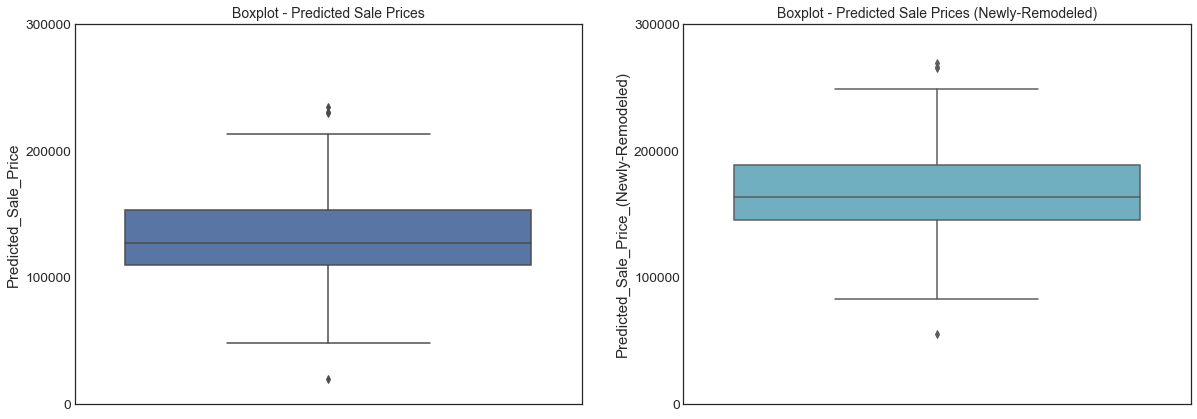

In [135]:
# Boxplots of Predicted Sales Prices of Targeted Houses
yt1 = [0, 100000, 200000, 300000]
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
sns.boxplot(y=TargetHouses['Predicted_Sale_Price'], color='b')
plt.title('Boxplot - Predicted Sale Prices', fontsize=14)
plt.yticks(yt1)
plt.subplot(1, 2, 2)
sns.boxplot(y=TargetHouses['Predicted_Sale_Price_(Newly-Remodeled)'], color='c')
plt.title('Boxplot - Predicted Sale Prices (Newly-Remodeled)', fontsize=14)
plt.yticks(yt1)
plt.show()

**5) Business Intelligence Analysis:** When we implement our predictive model on the data describing the houses that are in the current market, we can see that the average predicted sale price difference in the case of the newly-remodeling of a house is 31,940 Dollars. According to the budget of 25,000,000 Dollars, we identified **the top (189) houses** which are expected to **provide the most revenue opportunities in the case of the newly-remodeling**. 

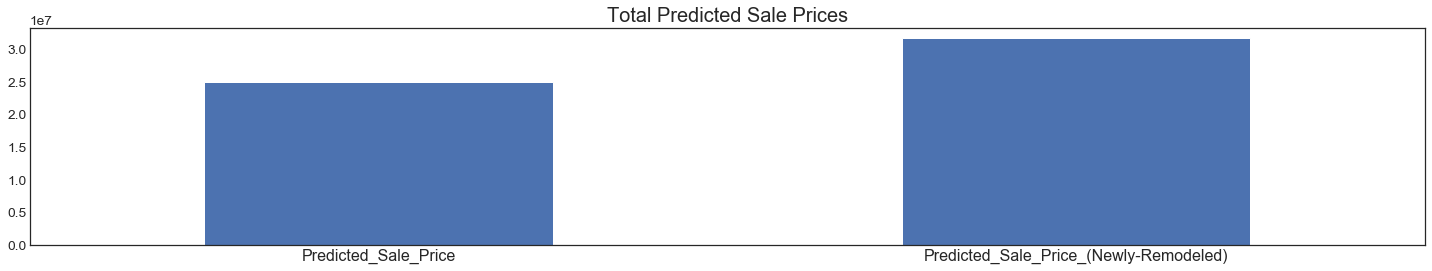

In [136]:
# Barchart of Total Predicted Sales Prices of Targeted Houses
RevenueOpportunity = TargetHouses.loc[:, ['Predicted_Sale_Price', 'Predicted_Sale_Price_(Newly-Remodeled)']]
plt.figure(figsize=(20,5))
RevenueOpportunity.sum().plot(kind='bar', figsize=(25,4))
plt.title('Total Predicted Sale Prices', fontsize=20)
plt.xticks(rotation=0, fontsize=16)
plt.show()

**6) Revenue Opportunity:** The total estimated sale price of the target 189 houses is **24,929,838 Dollars**. To sell these houses after remodeling them gives **6,723,442 Dollars more revenue opportunities**. With this extra revenue opportunity, by the end of 2010, the revenue is expected to **increase by ~27%**.

---

**CONCLUSION**

**According to our business problem scenario, BlueStone Realty Inc. wanted to have a strategy to increase revenues by at least 16% until the end of the year. After our market analysis, house remodeling strategy, regression analysis, house price predictions, and business intelligence analysis, we achieved a strategic solution that provides increased revenue by ~27%.**

---

### Thanks your time!